# Introduction 

Quantum computations are expressed by quantum circuits, which consist of a list of gates, $G_1G_2...G_k$, each being a unitary matrix (a matrix $U$ is called unitary if $U^{-1}\,{=}\,U^\dagger$).  The basic gates include the identity transformation($Id$) that performs no computation, and Pauli matrices : <br>
<h3>
$$Id = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\hspace{1cm}X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\hspace{1cm}Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}\hspace{1cm}Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$
</h3>
<br>
All single-qubit quantum computations $U_1$ can be obtained by multiplyingthe roots of Pauli matrices (also known as Euler’s angle decomposition. However, to implement quantum transformations spanning multiple qubits, we need gates spanning more than one qubit, otherwise known as entangling gates.  It turns out that it suffices to add a very simple gate, called the $\text{CNOT}$ and defined as follows,
<h3>
$$ \text{CNOT} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix},$$
</h3>
to obtain computational universality in the sense of the ability to express arbitrary transformations as circuits with $U$ and $\text{CNOT}$ gates.  Both leading quantum computing technologies, superconducting circuits and trapped ions, allow a straightforward physical-level implementation of the above gates in practice. In both technologies, the cost of implementing the $\text{CNOT}$ gate exceeds that of arbitrary single-qubit $U_1$ gates.  Thus, an efficient quantum computation minimizes the use of the $\text{CNOT}$ gates

For instance, the Toffoli gate, performing the transformation $|a,b,c\rangle\mapsto|a,b,c\oplus ab\rangle$, is a quantum version of the Boolean AND gate; it can be implemented as shown in Figure 1.
![2560px-Qcircuit_ToffolifromCNOT.svg.png](2560px-Qcircuit_ToffolifromCNOT.svg.png "ShowMyImage")
Figure 1: Implementation of the Toffoli gate using two Hadamard gates $\text{H}$, six $\text{CNOT}$ gates, and seven $\text{T/}\hspace{0.1cm}\text{T}^\dagger$gates (credit: Wikipedia).  Individual qubits are denoted by horizontal wires, time flows from left to right.

A quantum circuit is said to implement an $n$-input $m$-output Boolean function $f(x)$ if it computes the transformation $|x,0,0\rangle \mapsto e^{i\theta(x)}|x,f(x),0\rangle$ for some arbitrary real-valued function $\theta(x)$, i.e., first part of the register passes unchanged, the second part accumulates the bit values of the desired function $f(x)$, and the third part, with $S$ qubits, is used as a computational scratch space. When $\theta(x) \equiv 2\pi$, implying $e^{i\theta(x)} \equiv 1$, the implementation is called phaseless.  We consider the phase $\theta(x)$ irrelevant in what follows, which is consistent with measuring the $m$ output bits immediately after implementing the circuit. Allowing the phase to take different values depending on the input introduces a degree of freedom that can be explored to obtain shorter circuits, as there are fewer conditions for the circuit to satisfy.  The total number of qubits spanned by such a circuit is $n\,{+}\,m\,{+}\,S$.  Note that the $S$-qubit scratch space needs to be returned to value $|0\rangle$ as otherwise, the implementation may not be used in quantum algorithms due to unwanted entanglement residing on the unreset scratch qubits.


# 1. Compute popcount function for n = 4 qubits
Popcount, also known as the Hamming weight or simply weight, is a popular instruction in classical computing that is utilized in certain implementations of quantum algorithms. In particular, this includes Hamiltonian dynamics simulation algorithms, which are considered to be among the most important as they offer exponential advantage over best-known classical algorithms for solutions to practical problems (in areas such as many-body physics, materials research, and chemistry). For the Boolean $n$-tuple $(x_1,x_2,...,x_n)$, popcount is defined as the integer sum of inputs, 
<h3>
$$\text{Popcount}(x_1,x_2,...,x_n)=(y_1,y_2,...,y_m)=x_1+x_2+...+x_n, $$
</h3>
where $m=\lfloor\log(n)\rfloor+1.$$

The task here is two provide three QASM circuits computing the mappings $|x,0,0\rangle \mapsto e^{i\theta_j(x)}|x,y_j(x),0\rangle$ expressed using single-qubit and $\text{CNOT}$ gates, where $(y_1,y_2,y_3) \,{=}\, \text{Popcount}(x)$ is the 4-input 3-output Popcount function and $j \in \{1,2,3\}$. Each of the three will be scored separately.

# Rephrasing in Easy Wording

<h3>
$$\text{Popcount}(x_1,x_2,...,x_n) \text{ outputs number of 1s from } x_1 \text{ to } x_n \text{ in binary format }$$
</h3>

This question ask Popcount for a **fixed n** where $n=4$ we can represent its hamming weight using 3 bits. (from $000$ to $100$). 

For this question, **they want 3 circuits for each bit** of the output. **But there's a catch**, we don't need to output the correct phase of it. *Which we'll see later that allowing relative phase circuit can hugely reduce the circuit cost*.


# Solving it

There are two ways to tackle this problem, namely:

1. Using the classical reversible circuit way
2. Looking at it from quantum perspective (i.e. QFT-like)

## a) Circuit for j = 1
<h3>
$$|x,0,0\rangle \mapsto e^{i\theta_{1}(x)}|x,y_{1}(x),0\rangle$$

## Idea

- determining wether there are even or odd number of ones.
- quantumly, since output depends on every bit of input ($n$). We need at least $n$ entangling gates (CNOT) to entangle $n+1$ qubits (lower bound)

In [1]:
# Importing the qiskit module
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy import pi

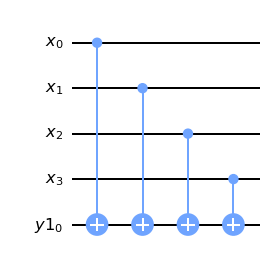

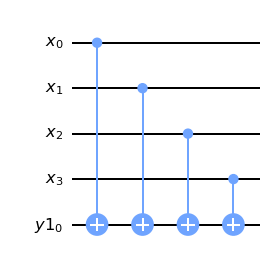

In [2]:
qr = QuantumRegister(4, 'x')
out = QuantumRegister(1, 'y1')
qc = QuantumCircuit(qr, out)
    
for i in range(4):
    qc.cx(qr[i], out[0])
    
########################################

# Uncomment to draw quantum circuit
display(qc.draw('mpl'))

# Transpiling the circuit into u, cnot
qc = transpile(qc, basis_gates=['u3','cx'])

# Uncomment to draw transpiled circuit
display(qc.draw('mpl'))

Above circuit uses 4 CNot with CNot depth equals 4 and 0 ancilla.

<h3>
$Cost = 4 + 4 = 8$
</h3>

## b) Circuit for j = 2
<h3>
 $$|x,0,0\rangle \mapsto e^{i\theta_{2}(x)}|x,y_{2}(x),0\rangle$$

## Idea Classical Way

- One way to calculate the output is $ y_2 = \bigoplus_{i,j} x_i x_j \text{ for all $i \neq j$ }$
- We can use CCX (Toffoli gate) to achieve this as shown below and we don't need ancilla

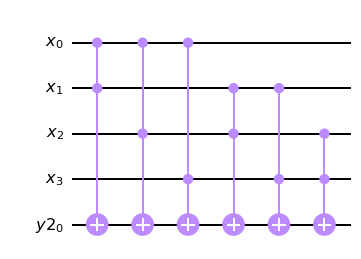

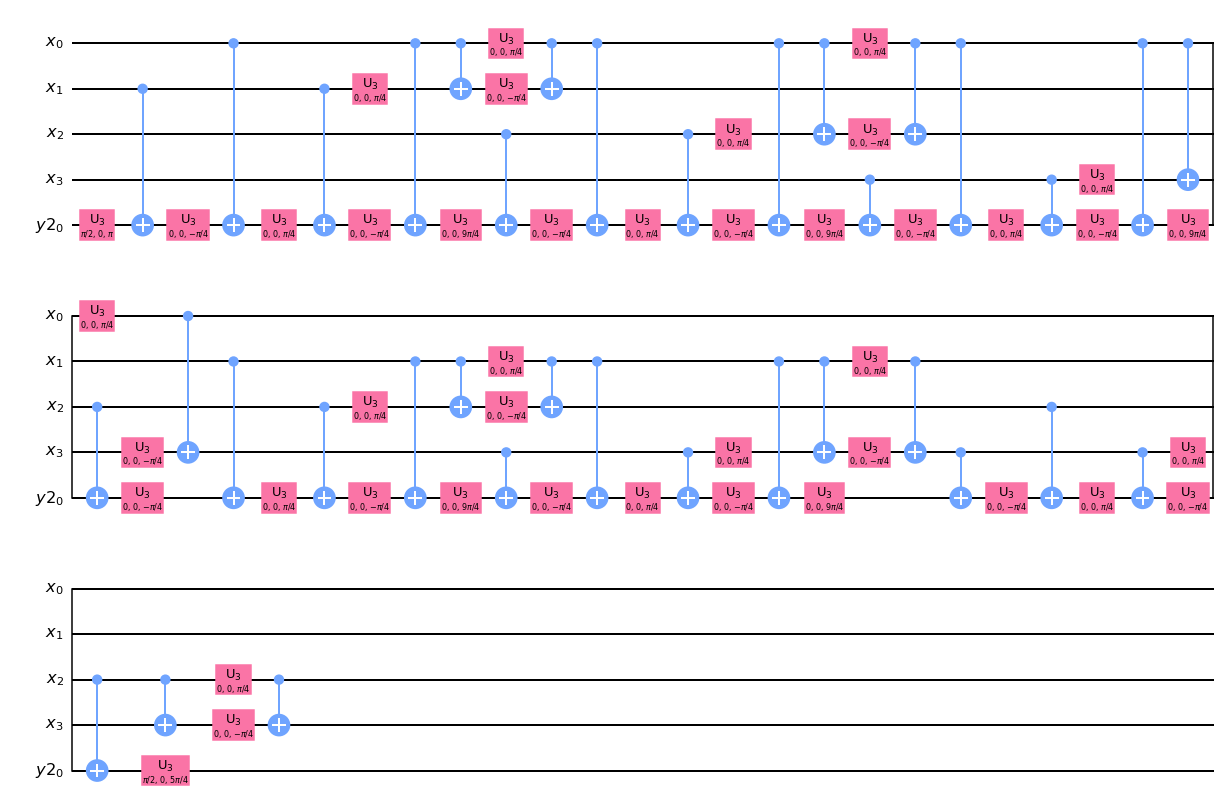

In [3]:
qr = QuantumRegister(4, 'x')
out = QuantumRegister(1, 'y2')
qc = QuantumCircuit(qr, out)
    
for i in range(4):
    for j in range(i+1, 4):
        qc.ccx(qr[i], qr[j], out[0])
    
########################################

# Uncomment to draw quantum circuit
display(qc.draw('mpl'))

# Transpiling the circuit into u, cnot
qc = transpile(qc, basis_gates=['u3','cx'])

# Uncomment to draw transpiled circuit
display(qc.draw('mpl'))

As seen from above transpiled circuit, the cost is huge. We need 36 CNots (6 for each CCX) and depth of ~36 (some reordering is possible to reduce the depth but still very deep)

**This is where the relative phase part comes into play**

By just changing CCX to relative phase Toffoli (RCCX in qiskit)

**Reading Reference**
- Maslov2015  https://arxiv.org/abs/1508.03273
- Barenco1995 https://arxiv.org/abs/quant-ph/9503016
- Song2003    https://arxiv.org/abs/quant-ph/0312225

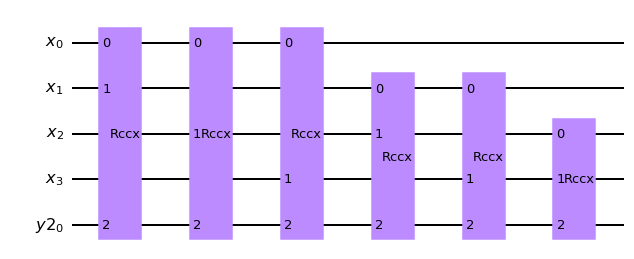

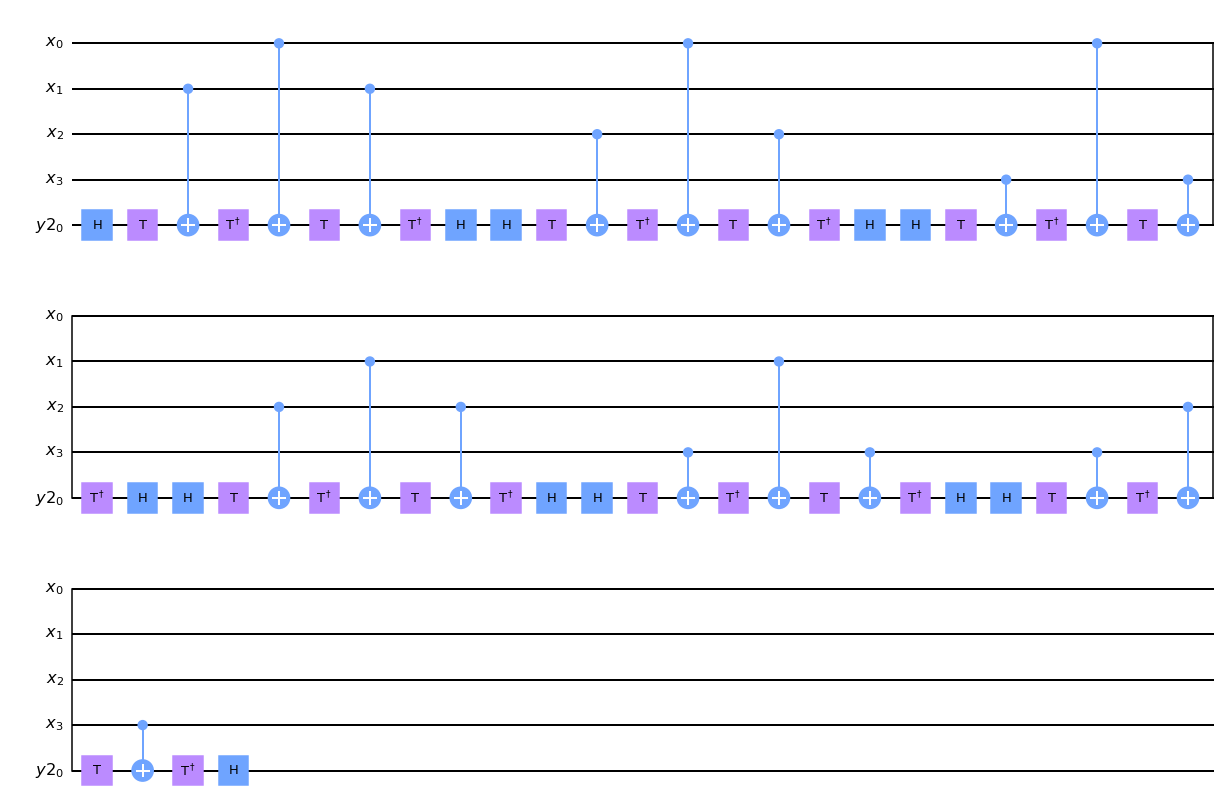

In [4]:
qr = QuantumRegister(4, 'x')
out = QuantumRegister(1, 'y2')
qc = QuantumCircuit(qr, out)
    
for i in range(4):
    for j in range(i+1, 4):
        qc.rccx(qr[i], qr[j], out[0])
    
########################################

# Uncomment to draw quantum circuit
display(qc.draw('mpl'))

# Transpiling the circuit into u, cnot
qc = transpile(qc, basis_gates=['h', 't', 'tdg', 'u3','cx'])

# Uncomment to draw transpiled circuit
display(qc.draw('mpl'))

The cost went from ~72 to 36 (18 CNots + 18 CNot-depth)
but can we do better than this?

## Using Ancilla Bit to help

instead of checking every pair which lead to $ n \choose 2 $ CNots, we use counter style circuit

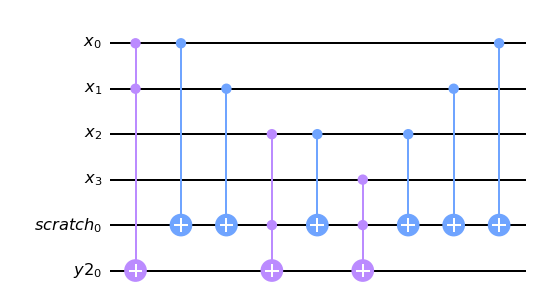

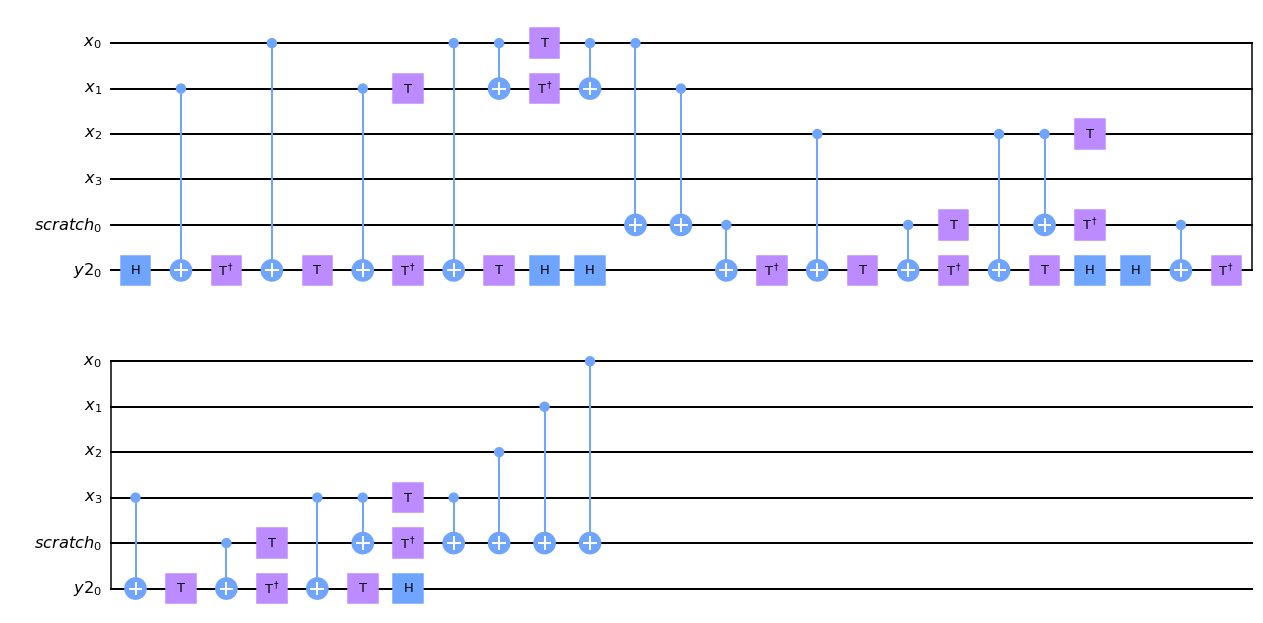

In [5]:
qr = QuantumRegister(4, 'x')
out = QuantumRegister(1, 'y2')
anc = QuantumRegister(1, 'scratch')
qc = QuantumCircuit(qr, anc, out)
    
qc.ccx(qr[0], qr[1], out[0])
qc.cx(qr[0], anc[0])
qc.cx(qr[1], anc[0])

qc.ccx(qr[2], anc[0], out[0])
qc.cx(qr[2], anc[0])

qc.ccx(qr[3], anc[0], out[0])

qc.cx(qr[2], anc[0])
qc.cx(qr[1], anc[0])
qc.cx(qr[0], anc[0])

# qc.mct([qr[2], qr[3], anc[0]], out[0])
    
########################################

# Uncomment to draw quantum circuit
display(qc.draw('mpl'))

# Transpiling the circuit into u, cnot
qc = transpile(qc, basis_gates=['h', 't', 'tdg', 'u3','cx'])

# Uncomment to draw transpiled circuit
display(qc.draw('mpl'))

And of course we can change all CCX to RCCX as well, which will result in 

Cost ~ 3x3 + 6 + 15 = 30

## The Quantum Way

Recalling that QFT-basis counts number differently, for the 2nd most significant bit each number rotates qubit around Z-axis by $\pi/4$ (where 0 is $\left|{+}\right\rangle$ state). The state vector only stays in the XY-plane and rotate around Z axis. 

But in QFT, we usually need the information about least significant bit to correct the state to $\left|{+}\right\rangle$ or $\left|{-}\right\rangle$ but we don't want store extra qubit (ancilla). So we want some operations to change the state pointing along Y axis back to X axis (left qubit to right qubit).

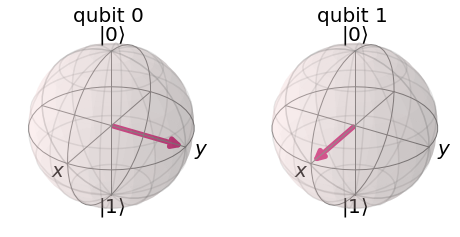

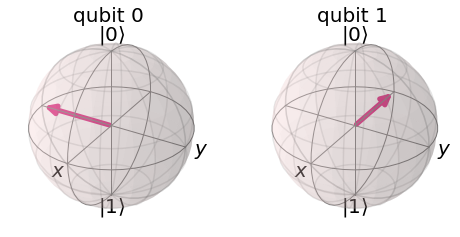

In [6]:
qc = QuantumCircuit(2)
qc.h(0)
qc.s(0)
qc.h(1)

sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
display(plot_bloch_multivector(statevector))

qc = QuantumCircuit(2)
qc.h(0)
qc.s(0)
qc.x(0)
qc.x(1)
qc.h(1)

sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
display(plot_bloch_multivector(statevector))

We can do so by rotating around vector below by $pi$, by the number of 1s that we encounter. Since it is self inverse, it does the job perfectly (our vector only goes along Y-axis when there are odd ones so it will cancel out when there are even ones and the vector already lies in X-axis).

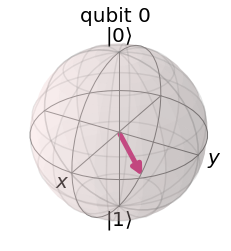

In [7]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)

sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
display(plot_bloch_multivector(statevector))

**Since we only want the behaviour to be like the one mentioned above**, we don't necessary need to do every in XY-plane, we can get the same effect but rotate our vector $pi/4$ each time around Y-axis instead and the correct rotation at the end will be around the vector between X-axis and Z-axis (which is the Hadamard gate)

0, 1, 2, 3 as the bloch sphere below and correct the vector using the second row bloch sphere

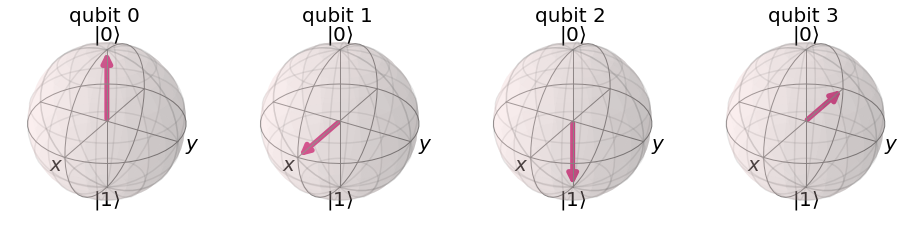

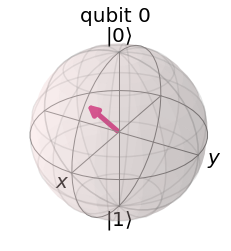

In [8]:
qc = QuantumCircuit(4)
qc.h(1)
qc.x(2)
qc.x(3)
qc.h(3)

sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
display(plot_bloch_multivector(statevector))

qc = QuantumCircuit(1)
qc.ry(pi/4, 0)

sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
display(plot_bloch_multivector(statevector))

We can build the circuit as below

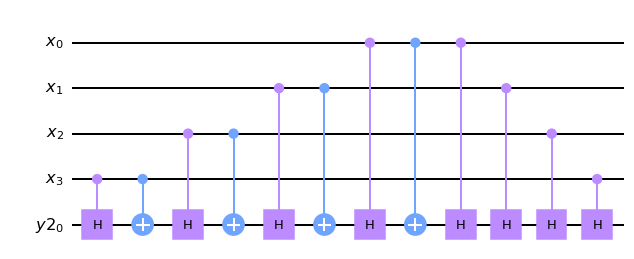

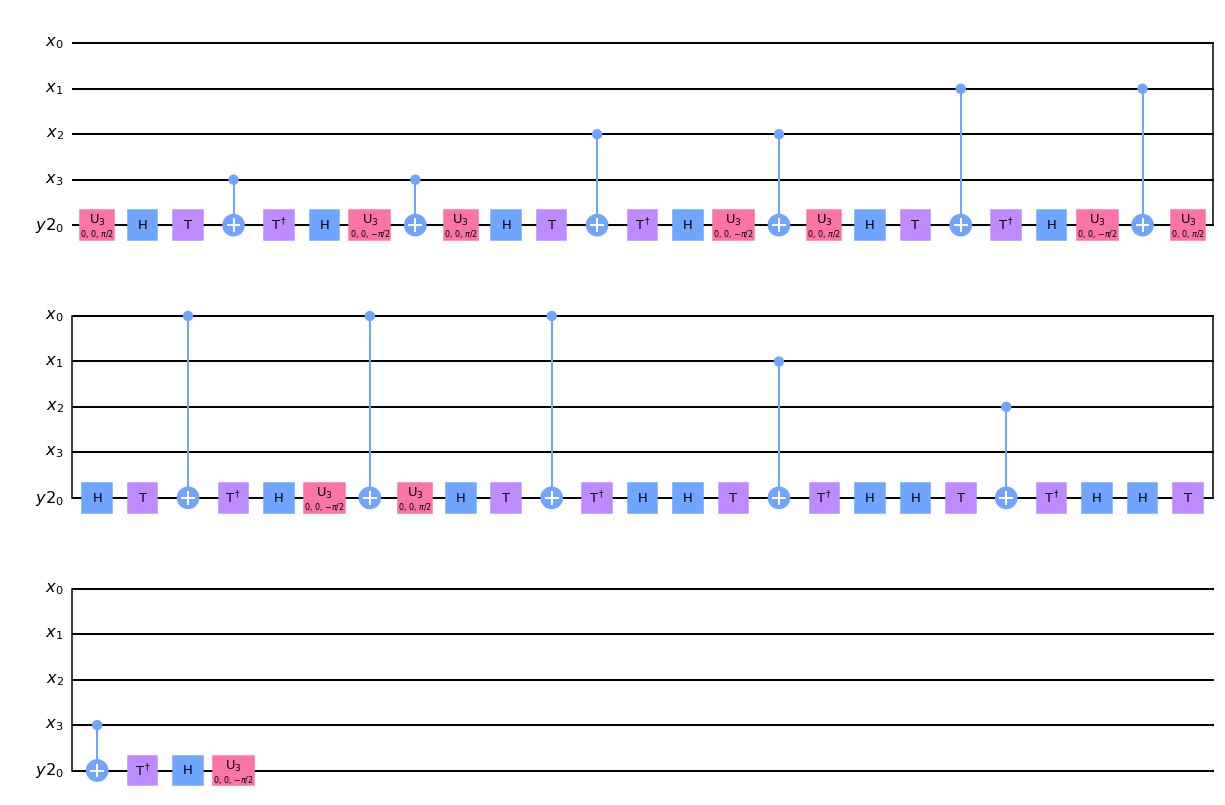

In [9]:
qr = QuantumRegister(4, 'x')
out = QuantumRegister(1, 'y2')
qc = QuantumCircuit(qr, out)
    
for i in reversed(range(4)):
    qc.ch(qr[i], out[0])
    qc.cx(qr[i], out[0])
for i in range(4):
    qc.ch(qr[i], out[0])
    
########################################

# Uncomment to draw quantum circuit
display(qc.draw('mpl'))

# Transpiling the circuit into u, cnot
qc = transpile(qc, basis_gates=['h', 't', 'tdg', 'u3','cx'])

# Uncomment to draw transpiled circuit
display(qc.draw('mpl'))

#### Note
- Since Ry(pi/4) has the same effect as HX (when the vector lies in the XZ-plane, we can use that instead) 
- Observe the the first CX is not needed so we can remove it ($R_y\left(\pi/4\right)\left|0\right\rangle$ is the same as $H\left|0\right\rangle$
- CH-CX-CH in for qubit $x_0$ can be replaced with CZ

so the simplified circuit is as shown below

**Reference Reading**
- Maslov2020 https://arxiv.org/abs/2008.06478


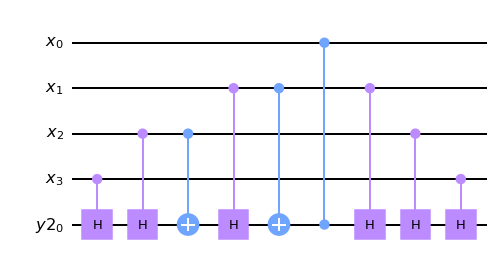

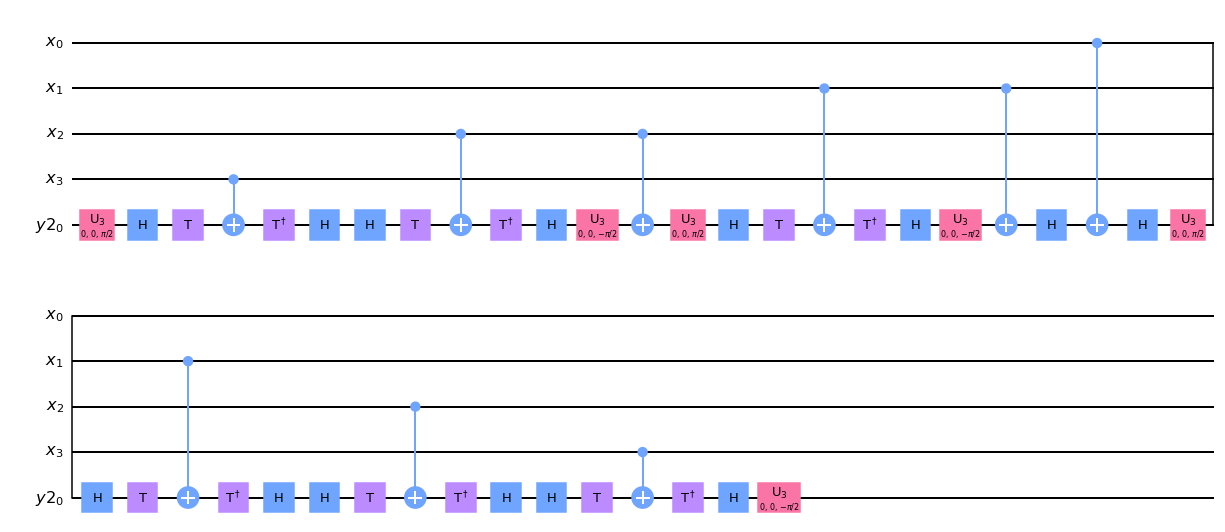

In [10]:
qr = QuantumRegister(4, 'x')
out = QuantumRegister(1, 'y2')
qc = QuantumCircuit(qr, out)
    
for i in reversed(range(1, 4)):
    qc.ch(qr[i], out[0])
    if i != 3:
        qc.cx(qr[i], out[0])
qc.cz(qr[0], out[0])
for i in range(1, 4):
    qc.ch(qr[i], out[0])
    
########################################

# Uncomment to draw quantum circuit
display(qc.draw('mpl'))

# Transpiling the circuit into u, cnot
qc = transpile(qc, basis_gates=['h', 't', 'tdg', 'u3','cx'])

# Uncomment to draw transpiled circuit
display(qc.draw('mpl'))

Resulting in total of 9 CNots and 9 CNot-depth,

$Cost = 18$

## c) Circuit for j = 3
<h3>
 $$|x,0,0\rangle \mapsto e^{i\theta_{3}(x)}|x,y_{3}(x),0\rangle$$

For this question, output will become one when all input bit of X are 1. 
The direct approach is to use MCT (Multi-controlled Toffoli). In Qiskit, there is `qc.mct` and we can use it directly. The best mode is `'v-chain'` but it requires `n-2` ancilla for `n` controls. 

As we have seen from question (b), relative phase version will always have lower cost. So referring to Maslov2015 paper (Figure 4), but this time we change all `CX(c, d)` to `CCX(c, x, d)` with x be the new additional control bit making it 4 controls instead of 3. We have to be aware of the phase but we can use the Figure 3 as our base for the type-c RCCX but the CZ(a, c) will cancel each other out. So the RCCX in qiskit works fine. Or we could use Margolus style gate, which operate on Ry while the rest of Fig 4 operate on Rz so it won't collide. 

**Reference**
- Maslov2015 https://arxiv.org/abs/1508.03273

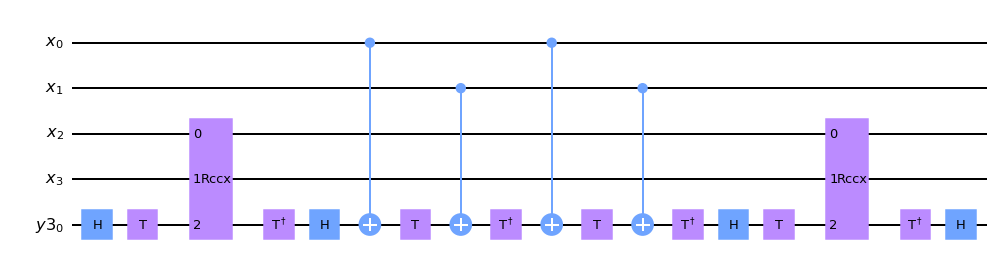

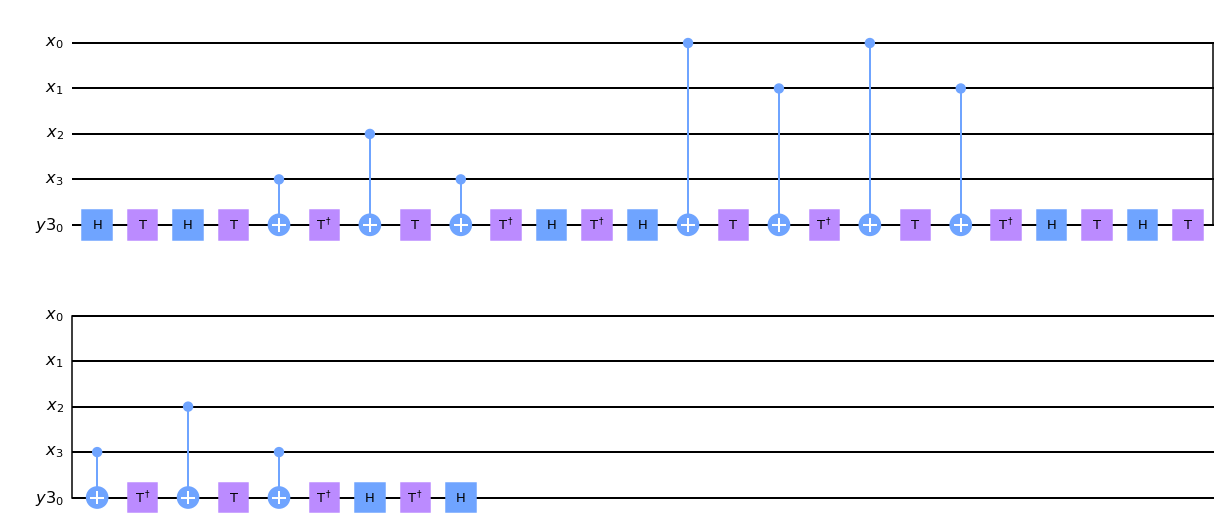

In [11]:
qr = QuantumRegister(4, 'x')
out = QuantumRegister(1, 'y3')
qc = QuantumCircuit(qr, out)
    
qc.h(out[0])
qc.t(out[0])
qc.rccx(qr[2], qr[3], out[0])
qc.tdg(out[0])

qc.h(out[0])
qc.cx(qr[0], out[0])
qc.t(out[0])
qc.cx(qr[1], out[0])
qc.tdg(out[0])
qc.cx(qr[0], out[0])
qc.t(out[0])
qc.cx(qr[1], out[0])
qc.tdg(out[0])
qc.h(out[0])
qc.t(out[0])
qc.rccx(qr[2], qr[3], out[0])
qc.tdg(out[0])
qc.h(out[0])

    
########################################

# Uncomment to draw quantum circuit
display(qc.draw('mpl'))

# Transpiling the circuit into u, cnot
qc = transpile(qc, basis_gates=['h', 't', 'tdg', 'u3','cx'])

# Uncomment to draw transpiled circuit
display(qc.draw('mpl'))

With the above circuit, the cost is 20 (10 CNots + 10 depth) 

### A more intuitive way

We know that $Z\left|0\right\rangle = \left|0\right\rangle$ so another way to build MCT is to use MCH-MCZ-MCH in succession and the set of controls of MCH and MCZ is non-overlapping. In this case, we can do as illustrate below with relative phase version of both CCH and CCZ which become CCH (margolus style) and CC-iZ (H-typeC_RCCX-H) as illustrate in Maslov2015 (again).

**Reference**
- Maslov2015 https://arxiv.org/abs/1508.03273

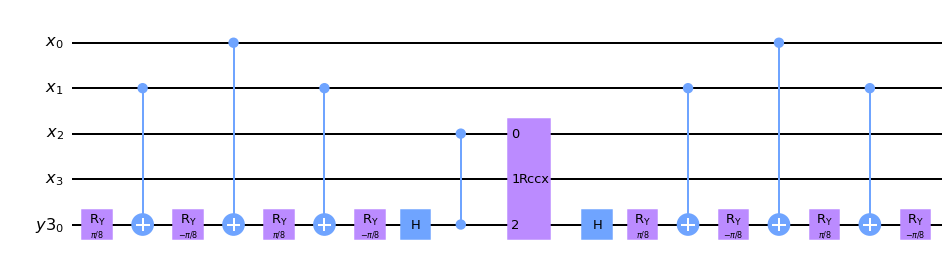

In [12]:
qr = QuantumRegister(4, 'x')
out = QuantumRegister(1, 'y3')
qc = QuantumCircuit(qr, out)

phi = pi/8
## CCH
qc.ry(phi, out[0])
qc.cx(qr[1], out[0])
qc.ry(-phi, out[0])
qc.cx(qr[0], out[0])
qc.ry(phi, out[0])
qc.cx(qr[1], out[0])
qc.ry(-phi, out[0])

## CCZ
qc.h(out[0])
qc.cz(qr[2], out[0])
qc.rccx(qr[2], qr[3], out[0])
qc.h(out[0])

## CCH
qc.ry(phi, out[0])
qc.cx(qr[1], out[0])
qc.ry(-phi, out[0])
qc.cx(qr[0], out[0])
qc.ry(phi, out[0])
qc.cx(qr[1], out[0])
qc.ry(-phi, out[0])

display(qc.draw(output='mpl'))
qc = transpile(qc, basis_gates=['h', 't', 'u3', 'cx'])

This will also result in cost = 20 same as previous version.

# Circuit verification and Cost Metric

$\textbf{Costing metric:}$ Circuit implementation cost is computed as follows, 
$$\text{Cost} = G+D+\frac{nS}{2},$$ 
where $G$ is the number of $\text{CNOT}$ gates used (note how the single-qubit gates are "free", which takes into account their relatively small implementation cost), $D$ is the two-qubit circuit depth (defined as the maximum length of the shortest path from any starting qubit to any ending qubit in the circuit going left, up, or down along the lines in the circuit diagram and counting the number of two-qubit gates), and $S$ is the number of scratch qubits used.  The timeout for verification is set to $5$ minutes.  All implementations that time out or compute any of the popcount outputs incorrectly are assigned the score of ${+}\infty$; the implementation with the smallest value of $\text{Cost}$ wins.